In [1]:
#import all essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(linewidth=110)

In [2]:
# increase screen width size
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# to see all columns in the dataframe
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#increase the plot size of charts
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
# read the input data
df = pd.read_csv('train.csv')

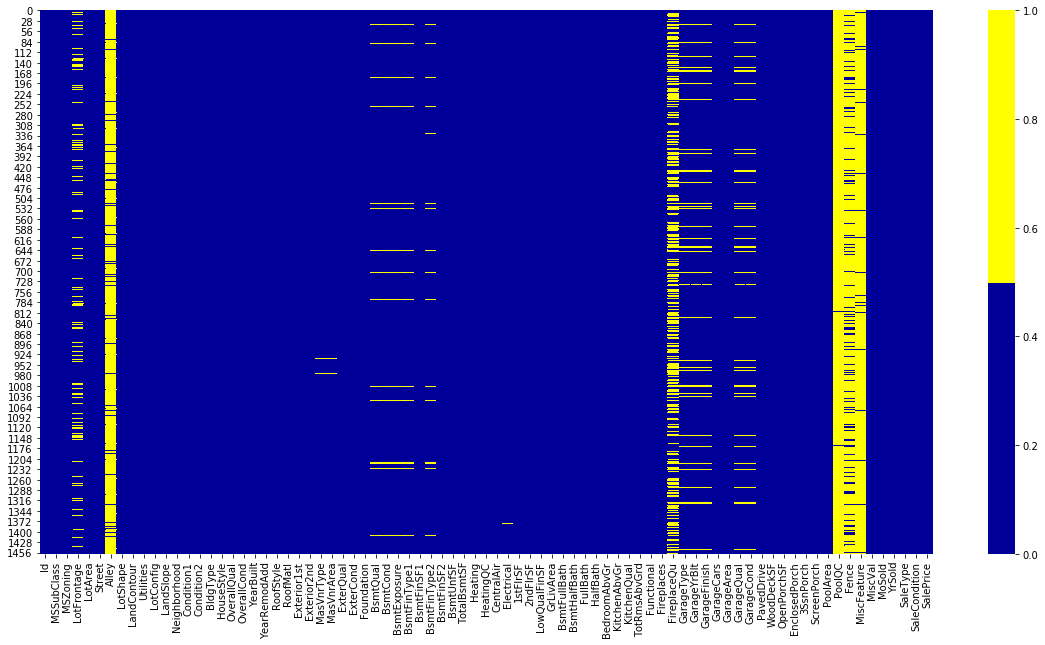

In [4]:
# to check any missing values
cols = df.columns[:] # all 82 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
# identify all columns that have a missing value of more than 5%
df.columns[df.isnull().mean()>0.05]

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
# split the variables first into a set of numerical and categorical variable list and fit them separately as a learning exercise
# a. split categorical variables
cat = ['Id','MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
'Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
'PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

# create the categorical variable dataframe
dfc = df[cat]

In [7]:
# calculate the ade of the property to include as a numerical variable into the model
# Age = Year sold - Year remodified
df['Age'] = df['YrSold']-df['YearRemodAdd']

In [8]:
# b. split numerical variables
num = ['Id','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','Age','SalePrice']

# create the numerical variables dataframe
dfn = df[num]

In [9]:
# to check if there are missing variables in categorical variables
dfc.columns[dfc.isnull().mean()>0.05]

Index(['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [10]:
# to check if there are missing variables in numerical variables
dfn.columns[dfn.isnull().mean()>0.05]

Index(['LotFrontage', 'GarageYrBlt'], dtype='object')

In [11]:
# some of the missing value columns were dropped instead of attributing mode or mean as the missing value percentage is quite large
dfc = dfc.drop(['Alley','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'], axis=1)
dfn = dfn.drop(['LotFrontage', 'GarageYrBlt'], axis=1)

In [12]:
# after dropping those columns that had a large % of missing values, a second round of check to identify remaining columns
dfn.columns[dfn.isnull().mean()>0]

Index(['MasVnrArea'], dtype='object')

In [13]:
# this step is to determine the % of missing values in the identified column
dfn['MasVnrArea'].isnull().mean()

0.005479452054794521

In [14]:
# since there were quite a lot of zeroes in the dataset, a check was done to identify the count of non-zero and zero counts
x = dfn[dfn['MasVnrArea'] > 0]
print("Count actual: {}, Count_nozeroes: {}".format(dfn['MasVnrArea'].count(), x['MasVnrArea'].count()))

Count actual: 1452, Count_nozeroes: 591


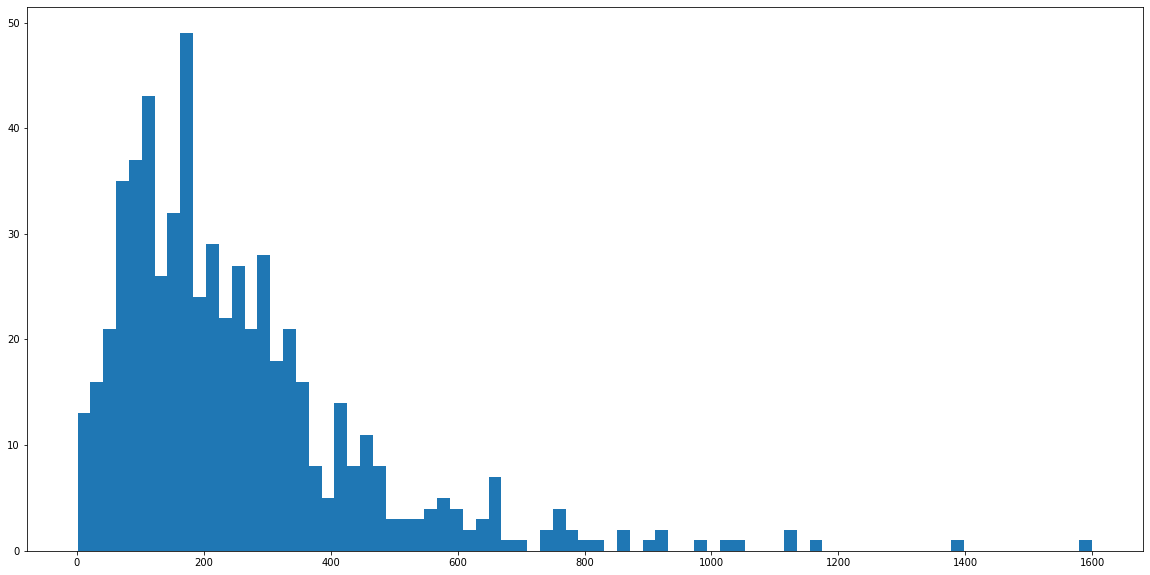

In [15]:
# a histogram was plotted to see the data distribution within the particular column
range = x['MasVnrArea'].max() - x['MasVnrArea'].min()
bins = int(range / 20)
plt.hist(x['MasVnrArea'], bins)
plt.show()

In [16]:
# fill the missing values in dfn with mean of the column
# fill-up missing values with 0
dfn['MasVnrArea'] = dfn['MasVnrArea'].fillna(0)
# check if there are anymore missing values
dfn['MasVnrArea'].isnull().mean()

0.0

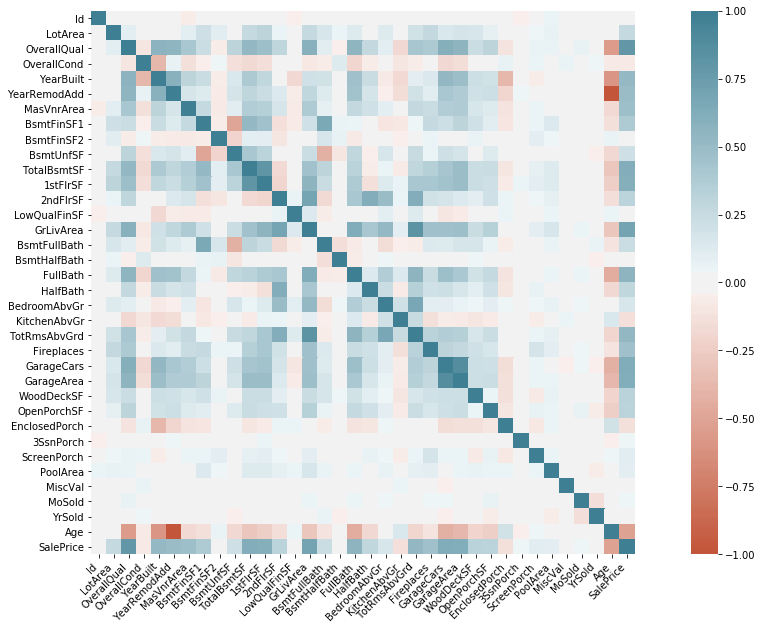

In [17]:
# Calculate correlation amongst the numerical variables
corr = dfn.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [18]:
# prepare the dataset for independent and dependent variables
dfn_x = dfn.drop(['Id','YearBuilt','YearRemodAdd','SalePrice'], axis = 1)
dfn_y = dfn[['SalePrice']]

### first model - model based on only numerical variables

In [19]:
# prepare datasets for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfn_x, dfn_y, test_size = 0.3, random_state = 0)

In [20]:
# fit a linear regression
from sklearn.linear_model import LinearRegression
model_lin_num = LinearRegression()
model_lin_num.fit(x_train, y_train)

# test whether linear model can predict the sale price with only numerical values
y_pred = model_lin_num.predict(x_test)

# calculate the r-square of the fitted model
from sklearn.metrics import r2_score, max_error, mean_absolute_error
r_sq_lin_num = r2_score(y_test, y_pred)
r_sq_lin_num

0.7151034416741091

In [22]:
# fit a ridge regression
from sklearn.linear_model import Ridge
model_rdg_num = Ridge()
model_rdg_num.fit(x_train, y_train)

# test whether ridge regression model can predict the sale price with numerical values
y_pred = model_rdg_num.predict(x_test)

# calculate the r-square to assess the fitness of equation
r_sq_rid = r2_score(y_test, y_pred)
r_sq_rid

0.7150068511145149

### second model - base model expanded to include categorical variables

In [23]:
dfc.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
# generate dummy values for all categorical values so that they can be included in the regression
# dropped the first variable in dummy value generation
dfc_1 = pd.get_dummies(dfc, columns=['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'], drop_first = True)

In [25]:
# combine the numerical and categorical dataframes on index to form a single dataframe
df_combined = pd.concat([dfn, dfc_1], axis=1, join = 'inner')

In [26]:
# drop the Id column as its not a independent variable
df_combined = df_combined.drop('Id', axis=1)
df_combined.head(2)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,5,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,

In [27]:
# assign x and y dataframes for fitting the regression
df_combined_x = df_combined
df_combined_y = dfn[['SalePrice']]

In [28]:
# prepare datasets for training and testing
# kept 30% of the dataset for out of sample validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_combined_x, df_combined_y, test_size = 0.3, random_state = 0)

In [30]:
# fit a linear regression
from sklearn.linear_model import LinearRegression
model_lin_com = LinearRegression()
model_lin_com.fit(x_train, y_train)

# use the model to predict y on validation sample
y_pred = model_lin_com.predict(x_test)

# calculate the goodness of fit
from sklearn.metrics import r2_score, max_error, mean_absolute_error
r_sq_lin_com = r2_score(y_test, y_pred)
r_sq_lin_com

1.0

In [32]:
# calculate the mean absolute error: mean of absolute value of errors
mer_lin_com = mean_absolute_error(y_test, y_pred)
mer_lin_com

3.07982315449682e-11

In [33]:
# calculate the mean squared error: mean of squared errors
max_lin_com = max_error(y_pred, y_test)
max_lin_com

2.3283064365386963e-10

In [35]:
# fit a Ridge regression
from sklearn.linear_model import Ridge
model_Rdg = Ridge()
model_Rdg.fit(x_train, y_train)

# use the model to predict y on validation sample
y_pred = model_Rdg.predict(x_test)

# calculate the goodness of fit
r_sq_Rdg = r2_score(y_test, y_pred)
r_sq_Rdg

1.0

In [34]:
# calculate the mean absolute error: mean of absolute value of errors
mer_rdg_com = mean_absolute_error(y_test, y_pred)
mer_rdg_com

3.07982315449682e-11

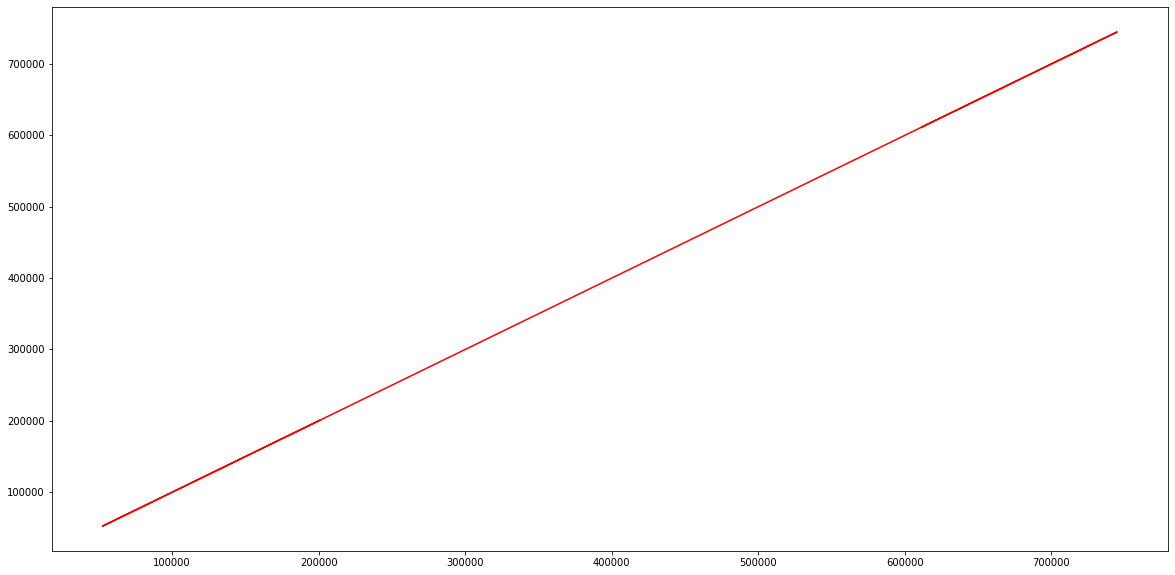

In [35]:
plt.plot(y_test, y_pred, color = 'red')

Text(0.5, 1.0, 'Actual')

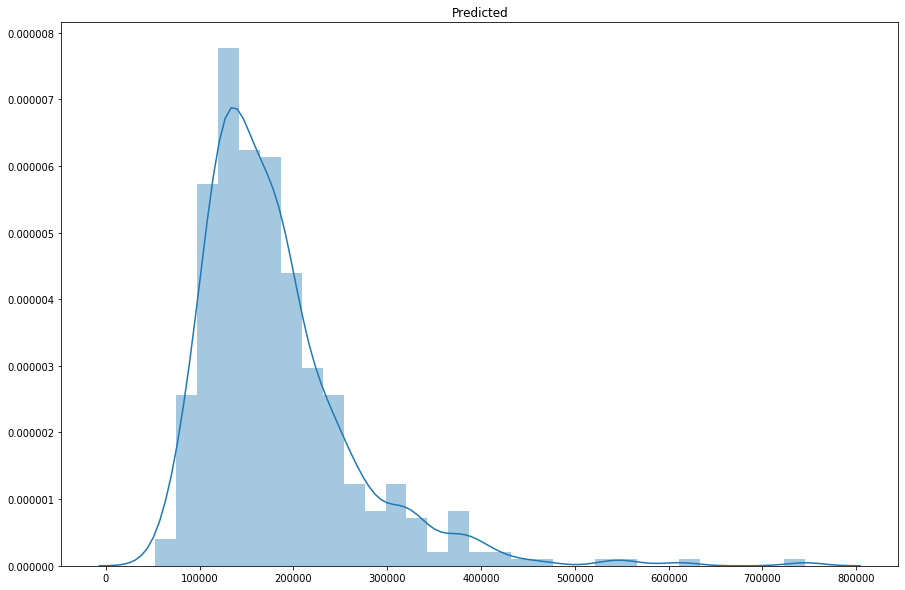

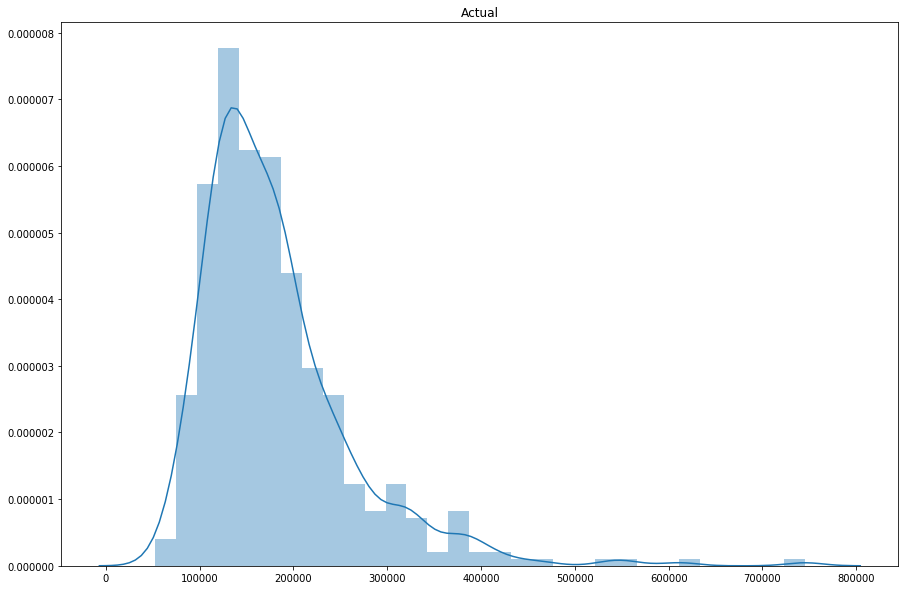

In [36]:
# plotting how y_pred looks like
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.distplot(y_pred)
plt.title('Predicted')
#plotting how y_test looks like
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.distplot(y_test)
plt.title('Actual')

In [38]:
pd.DataFrame(dict(zip(x_train.columns, model_lin_com.coef_[0])), index=[0]).T
#coefficients = pd.DataFrame({"Feature":x_train.columns, "Coefficients":np.transpose(model_lin_com.coef_)})

,0
LotArea,1.019753e-15
OverallQual,2.807532e-12
OverallCond,-7.458850e-12
YearBuilt,4.964779e-15
YearRemodAdd,4.486550e-13
MasVnrArea,-6.720948e-14
BsmtFinSF1,-1.835814e-14
BsmtFinSF2,3.620135e-14
BsmtUnfSF,-6.450190e-15
TotalBsmtSF,1.137447e-14
